# 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline 

# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [3]:
data = pd.read_csv("data/final_data.csv", index_col=0)

In [4]:
data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,1.0,0.0,0.0,1.0,NaN,NaN,NaN,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,05-24,16,월
439,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,05-24,16,월
440,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,05-24,16,월
441,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,05-24,16,월


# 함수
### - 오름차순 정렬 함수 정의

In [5]:
def ascend_sum(df):
    df['합계'] = df.sum(axis=1)
    df = df.sort_values('합계', ascending=True) # 합계를 기준으로 정렬
    df = df.iloc[:, :-1] # 합계 열 제외
    return df

### - 막대 그래프 함수 정의

In [6]:
def stack_bar(df, kind='bar', text=None, stack=False):
    df.plot(kind=kind, figsize=(10,10), fontsize=15, stacked=stack),
    plt.ylabel(''),
    plt.title(text),
    plt.show()

### - 메뉴 리스트 저장

In [7]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
             '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

# EDA
### (1) 성별, 연령대별 1순위 음식 분류

In [8]:
a1 = data.pivot_table("기온",
                      columns=["성별","연령대"],
                      index="1순위",
                      aggfunc="count")
a1

성별     남자                      여자                  
연령대    노년   중장년    청년   청소년    노년   중장년    청년   청소년
1순위                                                
분식    2.0   1.0   4.0   7.0   2.0   6.0  10.0   8.0
양식    NaN   6.0  21.0  26.0   2.0   5.0  15.0   6.0
일식    4.0   2.0  24.0  24.0   4.0   3.0  15.0  11.0
중식    2.0   6.0   4.0   8.0   NaN   3.0   4.0   NaN
한식   19.0  35.0  47.0  18.0  15.0  30.0  31.0  13.0

In [9]:
a1 = ascend_sum(a1)
a1

성별     남자                      여자                  
연령대    노년   중장년    청년   청소년    노년   중장년    청년   청소년
1순위                                                
중식    2.0   6.0   4.0   8.0   NaN   3.0   4.0   NaN
분식    2.0   1.0   4.0   7.0   2.0   6.0  10.0   8.0
양식    NaN   6.0  21.0  26.0   2.0   5.0  15.0   6.0
일식    4.0   2.0  24.0  24.0   4.0   3.0  15.0  11.0
한식   19.0  35.0  47.0  18.0  15.0  30.0  31.0  13.0

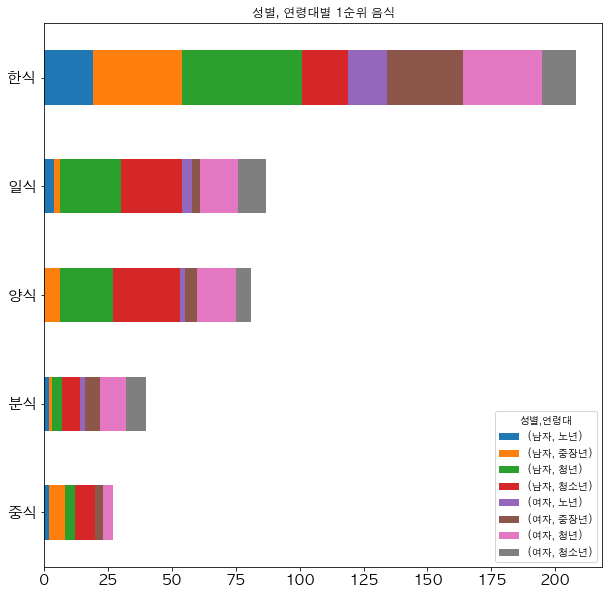

In [10]:
stack_bar(a1, kind='barh', text='성별, 연령대별 1순위 음식', stack=True)

### (2) 성별에 따른 메뉴 분포

In [11]:
a2 = ascend_sum(data.groupby('성별')[menu_list].sum().T)
a2

성별,남자,여자
볶음밥,37.0,25.0
칼국수,42.0,33.0
김밥,33.0,42.0
우동,43.0,37.0
햄버거,62.0,27.0
짬뽕,65.0,27.0
짜장면,71.0,28.0
냉면,60.0,41.0
메밀소바,57.0,46.0
된장찌개,67.0,43.0


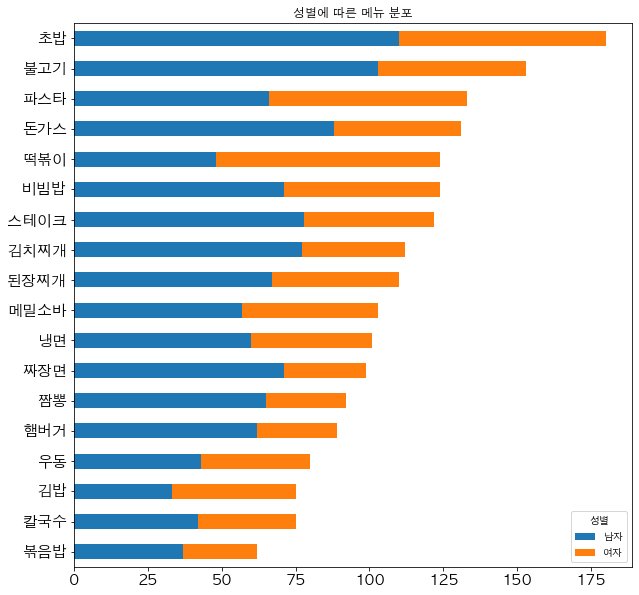

In [12]:
stack_bar(a2, kind='barh', text='성별에 따른 메뉴 분포', stack=True)

### (3) 기분에 따른 메뉴 분포

In [13]:
a3 = ascend_sum(data.groupby('기분')[menu_list].sum().T)
a3

기분,분노,우울,중립,행복
볶음밥,5.0,12.0,20.0,25.0
칼국수,2.0,15.0,25.0,33.0
김밥,2.0,17.0,26.0,30.0
우동,1.0,14.0,27.0,38.0
햄버거,3.0,19.0,31.0,36.0
짬뽕,3.0,16.0,32.0,41.0
짜장면,7.0,16.0,36.0,40.0
냉면,5.0,18.0,28.0,50.0
메밀소바,3.0,26.0,35.0,39.0
된장찌개,2.0,22.0,35.0,51.0


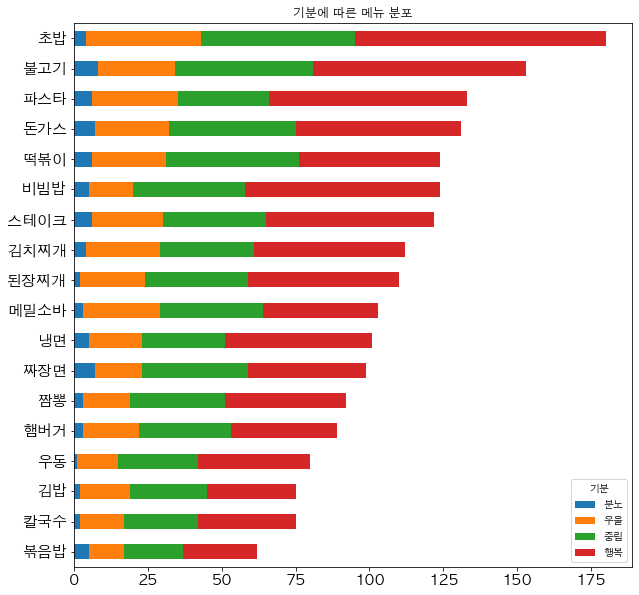

In [14]:
stack_bar(a3, kind='barh', text='기분에 따른 메뉴 분포', stack=True)

### (4) 요일에 따른 메뉴

In [15]:
a4 = data.groupby(['요일']).sum()[menu_list]
a4

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
요일,,,,,,,,,,,,,,,,,,
목,6.0,3.0,2.0,6.0,2.0,5.0,4.0,3.0,7.0,3.0,4.0,3.0,2.0,4.0,7.0,4.0,2.0,2.0
수,13.0,14.0,6.0,8.0,10.0,5.0,13.0,6.0,16.0,13.0,9.0,17.0,6.0,8.0,13.0,4.0,8.0,9.0
월,25.0,13.0,9.0,22.0,20.0,18.0,20.0,21.0,17.0,11.0,16.0,33.0,17.0,23.0,25.0,17.0,22.0,11.0
일,54.0,36.0,34.0,43.0,46.0,47.0,48.0,19.0,45.0,55.0,36.0,61.0,32.0,32.0,47.0,21.0,43.0,44.0
토,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0
화,54.0,33.0,24.0,31.0,46.0,37.0,39.0,26.0,48.0,40.0,24.0,64.0,23.0,35.0,39.0,15.0,22.0,26.0


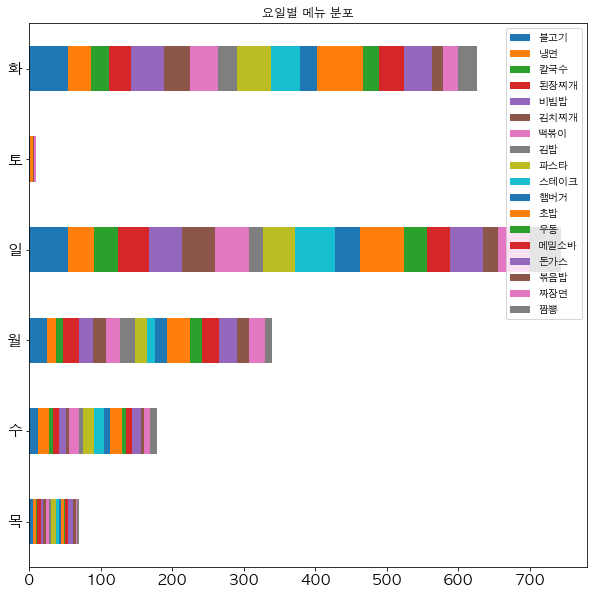

In [16]:
stack_bar(a4, kind='barh', text='요일별 메뉴 분포', stack=True)

### (5) 연령에 따른 전체메뉴

In [17]:
a5 = ascend_sum(data.groupby(['연령대']).sum()[menu_list])
a5

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
연령대,,,,,,,,,,,,,,,,,,
노년,13.0,6.0,6.0,9.0,9.0,7.0,6.0,12.0,4.0,5.0,7.0,15.0,10.0,11.0,10.0,12.0,10.0,11.0
중장년,37.0,15.0,9.0,19.0,37.0,17.0,15.0,14.0,23.0,31.0,8.0,36.0,6.0,21.0,7.0,11.0,17.0,21.0
청소년,45.0,46.0,33.0,33.0,31.0,37.0,43.0,16.0,42.0,46.0,34.0,56.0,36.0,31.0,40.0,14.0,33.0,31.0
청년,58.0,34.0,27.0,49.0,47.0,51.0,60.0,33.0,64.0,40.0,40.0,73.0,28.0,40.0,74.0,25.0,39.0,29.0


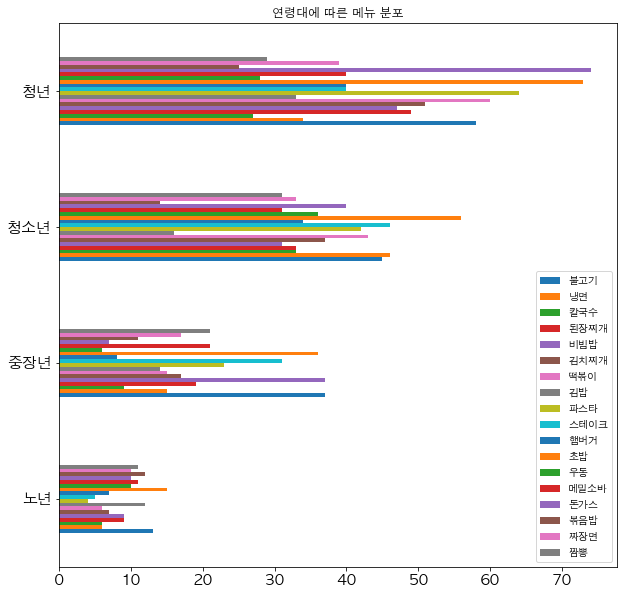

In [18]:
stack_bar(a5, kind='barh', text='연령대에 따른 메뉴 분포', stack=False)

### (6) 시간대에 따른 메뉴

In [19]:
a6 = ascend_sum(data.groupby('시간')[menu_list].sum().T)
a6

시간,0,2,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
볶음밥,2.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,5.0,4.0,5.0,6.0,13.0,6.0,4.0,1.0,5.0,2.0,0.0,1.0
칼국수,1.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,5.0,5.0,8.0,5.0,11.0,20.0,3.0,0.0,5.0,2.0,0.0,2.0
김밥,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,5.0,5.0,7.0,10.0,12.0,9.0,5.0,1.0,2.0,4.0,4.0,1.0
우동,1.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,3.0,4.0,9.0,8.0,12.0,16.0,3.0,1.0,6.0,1.0,2.0,3.0
햄버거,1.0,0.0,0.0,1.0,1.0,3.0,5.0,1.0,7.0,3.0,4.0,6.0,17.0,17.0,6.0,2.0,3.0,6.0,4.0,2.0
짬뽕,2.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,7.0,7.0,11.0,4.0,13.0,21.0,4.0,2.0,9.0,4.0,2.0,0.0
짜장면,1.0,0.0,0.0,0.0,1.0,6.0,6.0,2.0,6.0,7.0,3.0,4.0,15.0,22.0,8.0,2.0,8.0,3.0,3.0,2.0
냉면,0.0,0.0,1.0,0.0,0.0,4.0,5.0,3.0,4.0,8.0,12.0,9.0,14.0,21.0,6.0,0.0,10.0,3.0,0.0,1.0
메밀소바,1.0,0.0,0.0,0.0,1.0,4.0,5.0,3.0,11.0,6.0,10.0,13.0,17.0,17.0,7.0,0.0,2.0,2.0,2.0,2.0
된장찌개,1.0,0.0,0.0,1.0,2.0,5.0,8.0,3.0,14.0,3.0,11.0,4.0,19.0,18.0,5.0,1.0,10.0,2.0,1.0,2.0


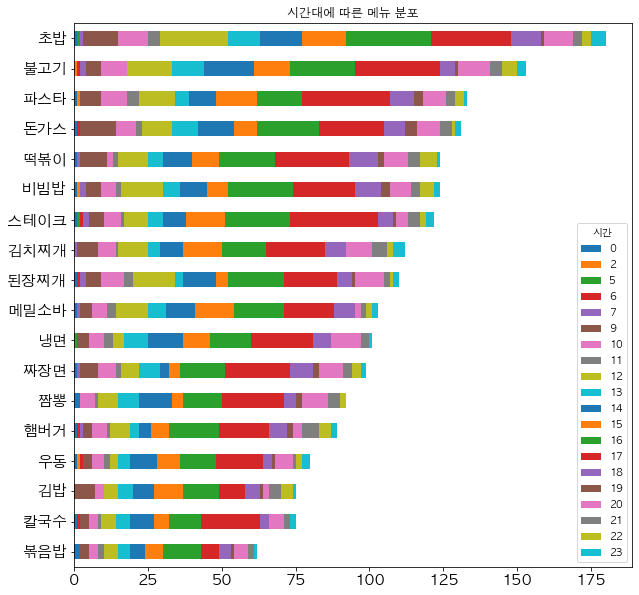

In [20]:
stack_bar(a6, kind='barh', text='시간대에 따른 메뉴 분포', stack=True)

### (7) 기온에 따른 메뉴

In [50]:
a7 = data.groupby(['기온']).sum()[menu_list].reset_index()
a7

,기온,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,10.7,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,13.3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,14.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
4,14.3,2.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,25.7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,25.9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,26.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,26.3,1.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0


In [51]:
a7["구간"] = pd.cut(a7["기온"], 5, right=False)

In [52]:
a7 = a7.groupby(['구간']).sum().iloc[:, 1:]
a7

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
구간,,,,,,,,,,,,,,,,,,
"[10.7, 13.86)",1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0
"[13.86, 17.02)",30.0,12.0,12.0,25.0,28.0,28.0,29.0,22.0,24.0,19.0,24.0,39.0,17.0,24.0,32.0,13.0,23.0,8.0
"[17.02, 20.18)",52.0,38.0,33.0,43.0,38.0,45.0,46.0,18.0,50.0,52.0,32.0,56.0,31.0,29.0,45.0,21.0,42.0,41.0
"[20.18, 23.34)",55.0,41.0,23.0,30.0,49.0,31.0,37.0,26.0,44.0,40.0,20.0,67.0,25.0,41.0,40.0,18.0,24.0,30.0
"[23.34, 26.516)",15.0,9.0,5.0,11.0,8.0,8.0,11.0,9.0,14.0,8.0,11.0,15.0,5.0,8.0,12.0,9.0,8.0,11.0


In [71]:
a7.index = '10°C', '15°C', '20°C', '23°C', '25°C'

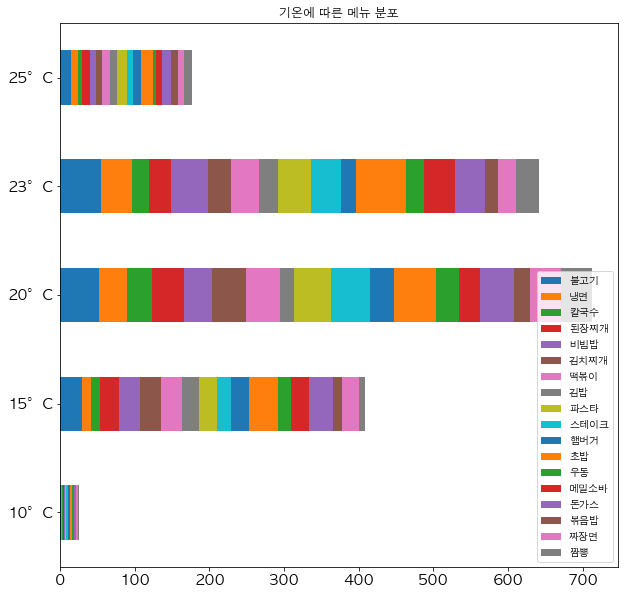

In [72]:
stack_bar(a7, kind='barh', text='기온에 따른 메뉴 분포', stack=True)